In [1]:
import mne

In [2]:


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy import signal
from sklearn.model_selection import train_test_split
import tensorflow as tf
from sklearn.metrics import confusion_matrix, classification_report
import random

In [3]:
data =pd.read_csv(r"C:\Users\jogip\Desktop\NIT\Data\labels.csv")

In [4]:
data.head(10)

,experiment_code,arousal,valence,emotion
0,SUB01TST04,8,3,fear
1,SUB01TST03,3,1,sad
2,SUB01TST02,5,5,neutral
3,SUB01VID25,8,7,surprise
4,SUB01VID24,4,4,sad
5,SUB01VID23,3,3,sad
6,SUB01VID21,7,1,angry
7,SUB01VID20,8,1,disgust
8,SUB01VID19,2,5,neutral
9,SUB01VID18,8,2,disgust


In [5]:
from glob import glob
import os
import mne
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [6]:
root_path =r"C:\Users\jogip\Desktop\NIT\Data"

In [7]:
label_filepath= root_path+'\labels.csv'
label_df = pd.read_csv(label_filepath)

In [8]:
def get_label( file_path):

  # Extract the filename from the absolute path
  filename = os.path.basename(file_path)

# Split the filename into parts using "_" as the delimiter
  filename_parts = filename.split("_")


# Specify the experiment code you are interested in
  target_experiment_code = filename_parts[0]
  # print('*****',target_experiment_code)
# Use loc to retrieve the arousal value for the specified experiment code
  arousal_value = label_df.loc[label_df['experiment_code'] == target_experiment_code, 'arousal' ].values

  if arousal_value < 4:
      return 0
  else:
      return 1 #arousal_value

In [9]:
root_path

'C:\\Users\\jogip\\Desktop\\NIT\\Data'

In [10]:
eeg_folder_path = root_path+'\Emotiv'+'\Emotiv'

import os

# Specify the root folder
# root_folder = '/path/to/your/root/folder'
fif_file_list =[]
# Walk through the root folder and its subfolders
for folder_path, subfolders, files in os.walk(eeg_folder_path):
    # print(f"Current folder: {folder_path}")
    fif_files = [os.path.join(folder_path, file) for file in files if file.endswith('.fif')]
    fif_file_list.extend(fif_files)
    # print(fif_files)
    # Print all files in the current subfolder
    # for file in fif_files:
    #     file_path = os.path.join(folder_path, file)
    #     print(f"  File: {file_path}")




In [11]:
def read_data(file_path):
    raw = mne.io.read_raw_fif(file_path, preload=True)

    #preprocess funtions
    raw.set_eeg_reference()
    raw.filter(l_freq=1,h_freq=45)
    return raw.get_data()

    # return epochs #trials,channel,length

In [12]:
len(fif_file_list)

487

In [13]:
raw_list = []
labels_list = []

# Iterate through the EEG epoch files in the folder
for file_path in fif_file_list:
    # Load each epoch file using MNE
    label=get_label(file_path)
    labels_list.append(label)
    raw = read_data(file_path)
    raw_list.append(raw)

Opening raw data file C:\Users\jogip\Desktop\NIT\Data\Emotiv\Emotiv\SUB01\SUB01VID01_eeg.fif...
    Range : 0 ... 15616 =      0.000 ...    61.000 secs
Ready.
Reading 0 ... 15616  =      0.000 ...    61.000 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 845 samples (3.301 s)

Opening raw data file C:\Users\jogip\Desktop\NIT\Data\Emotiv\Emotiv\SUB01\SUB01VID02_eeg.fif...
    Range : 0 ...

In [14]:
fif_file_list

['C:\\Users\\jogip\\Desktop\\NIT\\Data\\Emotiv\\Emotiv\\SUB01\\SUB01VID01_eeg.fif',
 'C:\\Users\\jogip\\Desktop\\NIT\\Data\\Emotiv\\Emotiv\\SUB01\\SUB01VID02_eeg.fif',
 'C:\\Users\\jogip\\Desktop\\NIT\\Data\\Emotiv\\Emotiv\\SUB01\\SUB01VID03_eeg.fif',
 'C:\\Users\\jogip\\Desktop\\NIT\\Data\\Emotiv\\Emotiv\\SUB01\\SUB01VID04_eeg.fif',
 'C:\\Users\\jogip\\Desktop\\NIT\\Data\\Emotiv\\Emotiv\\SUB01\\SUB01VID05_eeg.fif',
 'C:\\Users\\jogip\\Desktop\\NIT\\Data\\Emotiv\\Emotiv\\SUB01\\SUB01VID07_eeg.fif',
 'C:\\Users\\jogip\\Desktop\\NIT\\Data\\Emotiv\\Emotiv\\SUB01\\SUB01VID08_eeg.fif',
 'C:\\Users\\jogip\\Desktop\\NIT\\Data\\Emotiv\\Emotiv\\SUB01\\SUB01VID09_eeg.fif',
 'C:\\Users\\jogip\\Desktop\\NIT\\Data\\Emotiv\\Emotiv\\SUB01\\SUB01VID10_eeg.fif',
 'C:\\Users\\jogip\\Desktop\\NIT\\Data\\Emotiv\\Emotiv\\SUB01\\SUB01VID11_eeg.fif',
 'C:\\Users\\jogip\\Desktop\\NIT\\Data\\Emotiv\\Emotiv\\SUB01\\SUB01VID12_eeg.fif',
 'C:\\Users\\jogip\\Desktop\\NIT\\Data\\Emotiv\\Emotiv\\SUB01\\SUB01VID13_ee

In [17]:
type(raw_list)

list

C:\Users\jogip\AppData\Local\Temp\ipykernel_36904\1091875219.py:17: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout()


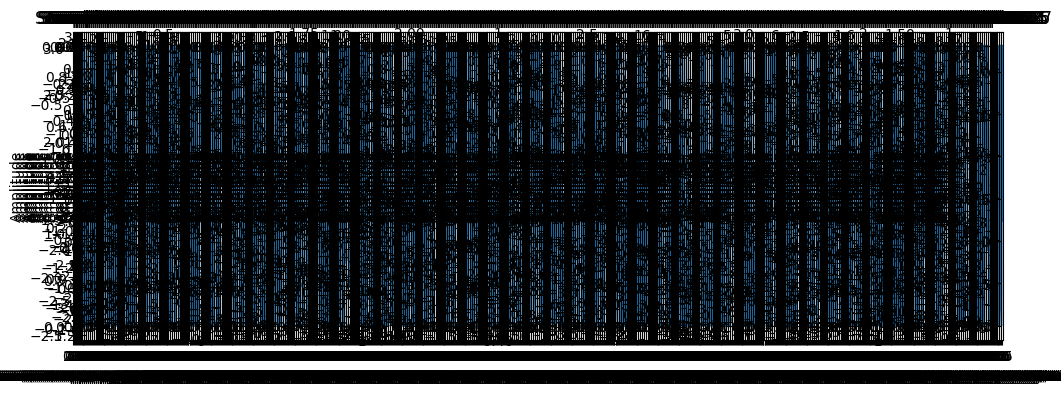

In [23]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'raw_list' is your list of sequences
num_samples = len(raw_list)
max_length = max(len(sample[0]) for sample in raw_list)

# Plot the first few points of each sequence
plt.figure(figsize=(12, 4))
for i in range(num_samples):
    plt.subplot(1, num_samples, i + 1)
    plt.plot(raw_list[i][0][:5])  # Plotting the first 100 points for illustration
    plt.title(f'Sample {i + 1}')
    plt.xlabel('Time (or Frequency) Points')
    plt.ylabel('Amplitude')

plt.tight_layout()
plt.show()


In [ ]:
import numpy as np
from mne.io import read_raw_fif
from scipy.fft import fft

In [24]:
import numpy as np
from mne.io import read_raw_fif
from scipy.fft import fft

# Define a function to apply Fourier transform to each epoch
def apply_fourier_transform(data):
    # Assuming data has shape (channels, samples)
    transformed_data = np.abs(fft(data, axis=1))  # Calculate magnitude of the Fourier transform
    return transformed_data

raw_list_data = []
labels_list = []

# Iterate through the EEG epoch files in the folder
for file_path in fif_file_list:
    # Load each epoch file using MNE
    label = get_label(file_path)
    labels_list.append(label)
    
    # Read raw EEG data
    raw = read_raw_fif(file_path, preload=True)
    data, _ = raw[:, :]  # Get the EEG data as a NumPy array
    
    # Apply Fourier transform to the raw EEG data
    transformed_data = apply_fourier_transform(data)
    
    # Append the transformed data to the raw_list
    raw_list_data.append(transformed_data)


Opening raw data file C:\Users\jogip\Desktop\NIT\Data\Emotiv\Emotiv\SUB01\SUB01VID01_eeg.fif...
    Range : 0 ... 15616 =      0.000 ...    61.000 secs
Ready.
Reading 0 ... 15616  =      0.000 ...    61.000 secs...
Opening raw data file C:\Users\jogip\Desktop\NIT\Data\Emotiv\Emotiv\SUB01\SUB01VID02_eeg.fif...
    Range : 0 ... 30976 =      0.000 ...   121.000 secs
Ready.
Reading 0 ... 30976  =      0.000 ...   121.000 secs...
Opening raw data file C:\Users\jogip\Desktop\NIT\Data\Emotiv\Emotiv\SUB01\SUB01VID03_eeg.fif...
    Range : 0 ... 30976 =      0.000 ...   121.000 secs
Ready.
Reading 0 ... 30976  =      0.000 ...   121.000 secs...
Opening raw data file C:\Users\jogip\Desktop\NIT\Data\Emotiv\Emotiv\SUB01\SUB01VID04_eeg.fif...
    Range : 0 ... 16128 =      0.000 ...    63.000 secs
Ready.
Reading 0 ... 16128  =      0.000 ...    63.000 secs...
Opening raw data file C:\Users\jogip\Desktop\NIT\Data\Emotiv\Emotiv\SUB01\SUB01VID05_eeg.fif...
    Range : 0 ... 46336 =      0.000 ...   1

C:\Users\jogip\AppData\Local\Temp\ipykernel_36904\115522707.py:17: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout()


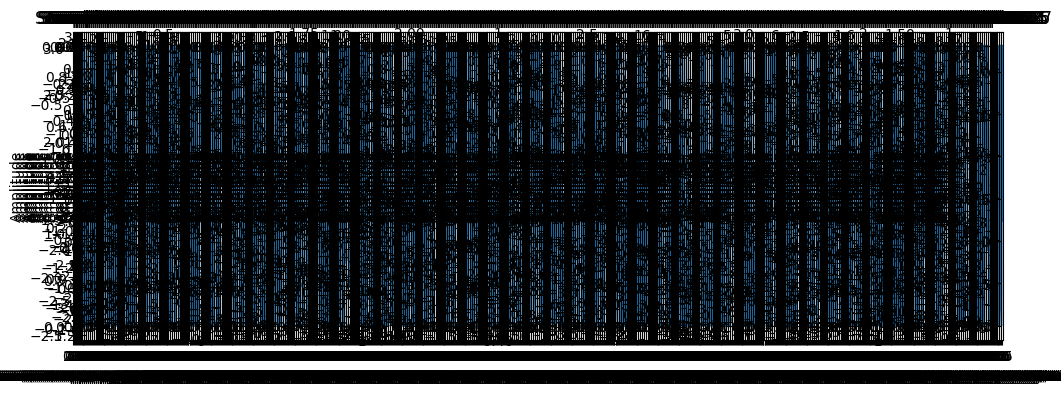

In [26]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'raw_list' is your list of sequences
num_samples = len(raw_list_data)
max_length = max(len(sample[0]) for sample in raw_list)

# Plot the first few points of each sequence
plt.figure(figsize=(12, 4))
for i in range(num_samples):
    plt.subplot(1, num_samples, i + 1)
    plt.plot(raw_list[i][0][:5])  # Plotting the first 100 points for illustration
    plt.title(f'Sample {i + 1}')
    plt.xlabel('Time (or Frequency) Points')
    plt.ylabel('Amplitude')

plt.tight_layout()
plt.show()


In [27]:
def make_windowing(X,Y):
    X_new = []
    Y_new = []
    npt = 128 # Window length
    stride = 128 # stride lenth
    ctr = 0
    for i in range(0,X.shape[0]):
        y = Y[i]
        a= X[i,:,:]
        a = a.transpose()
        a.shape
        val = 0
        kd=len(a)
        while val<=(len(a)-npt):
            x = a[val:val+npt,:]

            X_new.append(x.T)
            Y_new.append(y)
            val = val+stride

    return np.array(X_new),np.array(Y_new)

In [28]:
from scipy import stats
def mean(data):
    return np.mean(data,axis=-1)

def std(data):
    return np.std(data,axis=-1)

def ptp(data):
    return np.ptp(data,axis=-1)

def var(data):
      return np.var(data,axis=-1)

def minim(data):
      return np.min(data,axis=-1)


def maxim(data):
      return np.max(data,axis=-1)

def argminim(data):
      return np.argmin(data,axis=-1)


def argmaxim(data):
      return np.argmax(data,axis=-1)

def mean_square(data):
      return np.mean(data**2,axis=-1)

def rms(data): #root mean square
      return  np.sqrt(np.mean(data**2,axis=-1))

def abs_diffs_signal(data):
    return np.sum(np.abs(np.diff(data,axis=-1)),axis=-1)


def skewness(data):
    return stats.skew(data,axis=-1)

def kurtosis(data):
    return stats.kurtosis(data,axis=-1)

def concatenate_features(data):
    return np.concatenate((mean(data),
                           # std(data),
                          # ptp(data),
                          #  var(data),
                          #  minim(data),
                          #  maxim(data),
                          #  argminim(data),
                          #  argmaxim(data),
                            mean_square(data),
                            rms(data),
                         # abs_diffs_signal(data),
                           skewness(data),
                           kurtosis(data)
                          ), axis=-1)

In [29]:
from tqdm import tqdm
features=[]
for raw in tqdm(raw_list):
  features.append(concatenate_features(raw))
features=np.array(features)
labels = np.array(labels_list)

100%|██████████| 487/487 [00:20<00:00, 23.31it/s]


In [30]:
features.shape, labels.shape

((487, 70), (487,))

In [33]:
features

array([[ 3.77627410e-02,  2.35637960e-01, -2.41590832e-02, ...,
         6.55177292e+01,  9.12381437e-01,  3.74592965e+00],
       [ 2.51798566e-03,  2.63960451e-02, -3.47902425e-02, ...,
         2.05001069e+01,  7.28702634e+00,  1.53500713e+01],
       [ 5.82962794e-02,  1.46781549e-01, -1.52261807e-02, ...,
         3.70037205e+03,  3.75389009e+01,  3.70713743e+03],
       ...,
       [ 2.18306292e-02, -8.65337363e-03,  2.46921947e-02, ...,
         6.55765717e+00,  2.13345680e+00,  2.98201403e+00],
       [ 2.90716552e-02,  6.84249148e-02,  5.96523457e-04, ...,
         1.34177156e+01,  2.05327526e+00,  4.44978660e+00],
       [-1.98518229e-02, -1.30696475e-03, -1.70257754e-02, ...,
         1.54981535e+01,  9.55993594e+00,  7.02935620e+00]])

# exp

In [48]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.1, random_state=42)

# Create a preprocessing pipeline with StandardScaler and PCA
pipeline = make_pipeline(StandardScaler(), PCA(n_components=35))

# Fit and transform the training data
X_train_preprocessed = pipeline.fit_transform(X_train)

# Transform the test data
X_test_preprocessed = pipeline.transform(X_test)

# Train a Random Forest classifier
clf = RandomForestClassifier(n_estimators=35, random_state=42)
clf.fit(X_train_preprocessed, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test_preprocessed)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)

precision = metrics.precision_score(y_test, y_pred, average='macro')
recall = metrics.recall_score(y_test, y_pred, average='macro')
f1 = metrics.f1_score(y_test, y_pred, average='macro')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)


Accuracy: 0.7142857142857143
Precision: 0.5952380952380952
Recall: 0.5598290598290598
F1-Score: 0.5602564102564103


In [49]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for Grid Search
param_grid = {
    'n_estimators': [10, 20, 30, 40, 50],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create the GridSearchCV object
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5)

# Fit the grid search to the data
grid_search.fit(X_train_preprocessed, y_train)

# Print the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

# Make predictions on the test set using the best estimator
y_pred_grid = grid_search.best_estimator_.predict(X_test_preprocessed)

# Evaluate the classifier after hyperparameter tuning
accuracy_grid = accuracy_score(y_test, y_pred_grid)
precision_grid = metrics.precision_score(y_test, y_pred_grid, average='macro')
recall_grid = metrics.recall_score(y_test, y_pred_grid, average='macro')
f1_grid = metrics.f1_score(y_test, y_pred_grid, average='macro')

print("Accuracy after Hyperparameter Tuning:", accuracy_grid)
print("Precision after Hyperparameter Tuning:", precision_grid)
print("Recall after Hyperparameter Tuning:", recall_grid)
print("F1-Score after Hyperparameter Tuning:", f1_grid)


Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 40}
Accuracy after Hyperparameter Tuning: 0.673469387755102
Precision after Hyperparameter Tuning: 0.4636363636363636
Recall after Hyperparameter Tuning: 0.48290598290598286
F1-Score after Hyperparameter Tuning: 0.4555555555555555


In [50]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline

# Assuming 'features' is a 2D array of statistical features and 'labels' is the corresponding labels

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.1, random_state=42)

# Create a preprocessing pipeline with StandardScaler and PCA
pipeline = make_pipeline(StandardScaler(), PCA(n_components=10))

# Fit and transform the training data
X_train_preprocessed = pipeline.fit_transform(X_train)

# Transform the test data
X_test_preprocessed = pipeline.transform(X_test)

# Train a Random Forest classifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train_preprocessed, y_train)

# Train a Support Vector Machine classifier
svm_clf = SVC(kernel='linear', C=1.0, random_state=42)
svm_clf.fit(X_train_preprocessed, y_train)

# Train a k-Nearest Neighbors classifier
knn_clf = KNeighborsClassifier(n_neighbors=5)
knn_clf.fit(X_train_preprocessed, y_train)

# Make predictions on the test set for each classifier
rf_pred = rf_clf.predict(X_test_preprocessed)
svm_pred = svm_clf.predict(X_test_preprocessed)
knn_pred = knn_clf.predict(X_test_preprocessed)

# Evaluate the classifiers
rf_accuracy = accuracy_score(y_test, rf_pred)
svm_accuracy = accuracy_score(y_test, svm_pred)
knn_accuracy = accuracy_score(y_test, knn_pred)

print("Random Forest Accuracy:", rf_accuracy)
print("SVM Accuracy:", svm_accuracy)
print("k-Nearest Neighbors Accuracy:", knn_accuracy)


Random Forest Accuracy: 0.6938775510204082
SVM Accuracy: 0.7346938775510204
k-Nearest Neighbors Accuracy: 0.6938775510204082


# Random Forest Classifier Hyperparameter Tuning


In [51]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for Grid Search
rf_param_grid = {
    'n_estimators': [10, 50, 100, 150],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create the GridSearchCV object
rf_grid_search = GridSearchCV(RandomForestClassifier(random_state=42), rf_param_grid, cv=5)

# Fit the grid search to the data
rf_grid_search.fit(X_train_preprocessed, y_train)

# Print the best hyperparameters
print("Random Forest Best Hyperparameters:", rf_grid_search.best_params_)

# Make predictions on the test set using the best estimator
rf_best_pred = rf_grid_search.best_estimator_.predict(X_test_preprocessed)

# Evaluate the classifier after hyperparameter tuning
rf_best_accuracy = accuracy_score(y_test, rf_best_pred)
print("Random Forest Accuracy after Hyperparameter Tuning:", rf_best_accuracy)


Random Forest Best Hyperparameters: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 100}
Random Forest Accuracy after Hyperparameter Tuning: 0.7142857142857143


# Support Vector Machine (SVM) Hyperparameter Tuning


In [52]:
# Define the parameter grid for Grid Search
svm_param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']
}

# Create the GridSearchCV object
svm_grid_search = GridSearchCV(SVC(random_state=42), svm_param_grid, cv=5)

# Fit the grid search to the data
svm_grid_search.fit(X_train_preprocessed, y_train)

# Print the best hyperparameters
print("SVM Best Hyperparameters:", svm_grid_search.best_params_)

# Make predictions on the test set using the best estimator
svm_best_pred = svm_grid_search.best_estimator_.predict(X_test_preprocessed)

# Evaluate the classifier after hyperparameter tuning
svm_best_accuracy = accuracy_score(y_test, svm_best_pred)
print("SVM Accuracy after Hyperparameter Tuning:", svm_best_accuracy)


SVM Best Hyperparameters: {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}
SVM Accuracy after Hyperparameter Tuning: 0.7346938775510204


# k-Nearest Neighbors (kNN) Hyperparameter Tuning


In [53]:
# Define the parameter grid for Grid Search
knn_param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}

# Create the GridSearchCV object
knn_grid_search = GridSearchCV(KNeighborsClassifier(), knn_param_grid, cv=5)

# Fit the grid search to the data
knn_grid_search.fit(X_train_preprocessed, y_train)

# Print the best hyperparameters
print("k-Nearest Neighbors Best Hyperparameters:", knn_grid_search.best_params_)

# Make predictions on the test set using the best estimator
knn_best_pred = knn_grid_search.best_estimator_.predict(X_test_preprocessed)

# Evaluate the classifier after hyperparameter tuning
knn_best_accuracy = accuracy_score(y_test, knn_best_pred)
print("k-Nearest Neighbors Accuracy after Hyperparameter Tuning:", knn_best_accuracy)


k-Nearest Neighbors Best Hyperparameters: {'n_neighbors': 7, 'p': 2, 'weights': 'distance'}
k-Nearest Neighbors Accuracy after Hyperparameter Tuning: 0.6530612244897959


In [54]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

# Create a preprocessing pipeline with StandardScaler and PCA
pipeline = make_pipeline(StandardScaler(), PCA(n_components=35))

# Fit and transform the training data
X_train_preprocessed = pipeline.fit_transform(X_train)

# Transform the test data
X_test_preprocessed = pipeline.transform(X_test)

# Train a Decision Tree classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train_preprocessed, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test_preprocessed)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
precision = metrics.precision_score(y_test, y_pred, average='macro')
recall = metrics.recall_score(y_test, y_pred, average='macro')
f1 = metrics.f1_score(y_test, y_pred, average='macro')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)
#print(f'Accuracy: {accuracy}')

Accuracy: 0.5408163265306123
Precision: 0.4554227941176471
Recall: 0.44376811594202903
F1-Score: 0.44339265429761454


In [55]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for Grid Search
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create the GridSearchCV object
grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5)

# Fit the grid search to the data
grid_search.fit(X_train_preprocessed, y_train)

# Print the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

# Make predictions on the test set using the best estimator
best_pred = grid_search.best_estimator_.predict(X_test_preprocessed)

# Evaluate the classifier after hyperparameter tuning
best_accuracy = accuracy_score(y_test, best_pred)
print("Accuracy after Hyperparameter Tuning:", best_accuracy)


Best Hyperparameters: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2}
Accuracy after Hyperparameter Tuning: 0.6122448979591837


In [56]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline

# Assuming 'features' is your input data and 'labels' is the target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

# Create a preprocessing pipeline with StandardScaler and PCA
pipeline = make_pipeline(StandardScaler(), PCA(n_components=35))

# Fit and transform the training data
X_train_preprocessed = pipeline.fit_transform(X_train)

# Transform the test data
X_test_preprocessed = pipeline.transform(X_test)

# Train a Support Vector Classifier
svc = SVC(kernel='linear', C=1.0, random_state=42)
svc.fit(X_train_preprocessed, y_train)

# Make predictions on the test set
y_pred = svc.predict(X_test_preprocessed)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)


Accuracy: 0.7857142857142857
Precision: 0.890625
Recall: 0.5434782608695652
F1-Score: 0.5185964912280702


In [57]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Assuming 'features' is your input data and 'labels' is the target variable

# Create a preprocessing pipeline with StandardScaler and PCA
pipeline = make_pipeline(StandardScaler(), PCA(n_components=35))

# Fit and transform the training data
X_train_preprocessed = pipeline.fit_transform(X_train)

# Define the parameter grid for GridSearchCV
param_grid = {'svc__C': [0.1, 1, 10], 'svc__kernel': ['linear', 'rbf'], 'svc__gamma': ['scale', 'auto']}

# Create an SVC model
svc = SVC(random_state=42)

# Create a pipeline with the preprocessing and the SVC model
full_pipeline = make_pipeline(pipeline, svc)

# Use GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(full_pipeline, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print("Best Parameters:", grid_search.best_params_)

# Make predictions on the test set using the best estimator
y_pred = grid_search.best_estimator_.predict(X_test)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')


Best Parameters: {'svc__C': 0.1, 'svc__gamma': 'scale', 'svc__kernel': 'rbf'}
Accuracy: 0.7653061224489796


In [58]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Assuming 'features' is your input data and 'labels' is the target variable

# Create a preprocessing pipeline with StandardScaler and PCA
pipeline = make_pipeline(StandardScaler(), PCA(n_components=35))

# Fit and transform the training data
X_train_preprocessed = pipeline.fit_transform(X_train)

# Define the parameter grid for GridSearchCV
param_grid = {
    'svc__C': [0.1, 1, 10],
    'svc__kernel': ['linear', 'rbf'],
    'svc__gamma': ['scale', 'auto'],
    'svc__degree': [2, 3, 4],  # Degree of the polynomial kernel
    'svc__coef0': [0.0, 1.0],  # Independent term in the kernel function
    'svc__shrinking': [True, False],  # Whether to use the shrinking heuristic
    'svc__probability': [True, False],  # Whether to enable probability estimates
}

# Create an SVC model
svc = SVC(random_state=42)

# Create a pipeline with the preprocessing and the SVC model
full_pipeline = make_pipeline(pipeline, svc)

# Use GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(full_pipeline, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print("Best Parameters:", grid_search.best_params_)

# Make predictions on the test set using the best estimator
y_pred = grid_search.best_estimator_.predict(X_test)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')


Best Parameters: {'svc__C': 0.1, 'svc__coef0': 0.0, 'svc__degree': 2, 'svc__gamma': 'scale', 'svc__kernel': 'rbf', 'svc__probability': True, 'svc__shrinking': True}
Accuracy: 0.7653061224489796


In [59]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.datasets import make_classification
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Assuming 'features' is your input data and 'labels' is the target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.1, random_state=42)

# Create a preprocessing pipeline with StandardScaler and PCA
pipeline = make_pipeline(StandardScaler(), PCA(n_components=35))

# Fit and transform the training data
X_train_preprocessed = pipeline.fit_transform(X_train)

# Transform the test data
X_test_preprocessed = pipeline.transform(X_test)

# Create a simple neural network model with Keras
def create_neural_network(input_dim):
    model = Sequential()
    model.add(Dense(64, input_dim=input_dim, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# Get the number of features after PCA
input_dim = X_train_preprocessed.shape[1]

# Create the neural network model
model = create_neural_network(input_dim)

# Train the model
model.fit(X_train_preprocessed, y_train, epochs=10, batch_size=32, validation_split=0.1)

# Make predictions on the test set
y_pred_probs = model.predict(X_test_preprocessed)
y_pred = np.round(y_pred_probs)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')




Epoch 1/10


13/13 [==============================] - 1s 22ms/step - loss: 0.7316 - accuracy: 0.5990 - val_loss: 0.6518 - val_accuracy: 0.7500
Epoch 2/10
13/13 [==============================] - 0s 6ms/step - loss: 0.6292 - accuracy: 0.6929 - val_loss: 0.6546 - val_accuracy: 0.7500
Epoch 3/10
13/13 [==============================] - 0s 5ms/step - loss: 0.6003 - accuracy: 0.6980 - val_loss: 0.6544 - val_accuracy: 0.7500
Epoch 4/10
13/13 [==============================] - 0s 6ms/step - loss: 0.5783 - accuracy: 0.7107 - val_loss: 0.6467 - val_accuracy: 0.7500
Epoch 5/10
13/13 [==============================] - 0s 6ms/step - loss: 0.5600 - accuracy: 0.7259 - val_loss: 0.6474 - val_accuracy: 0.7500
Epoch 6/10
13/13 [==============================] - 0s 6ms/step - loss: 0.5496 - accuracy: 0.7259 - val_loss: 0.6476 - val_accuracy: 0.7500
Epoch 7/10
13/13 [==============================] - 0s 6ms/step - loss: 0.5376 - accuracy: 0.7284 - val_loss: 0.6651 - val_accuracy: 0.7500
Epoch 8/10
13/1

In [65]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Assuming 'features' is your input data and 'labels' is the target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.1, random_state=42)

# Create a preprocessing pipeline with StandardScaler and PCA
pipeline = make_pipeline(StandardScaler(), PCA(n_components=35))

# Fit and transform the training data
X_train_preprocessed = pipeline.fit_transform(X_train)

# Transform the test data
X_test_preprocessed = pipeline.transform(X_test)

# Reshape data for CNN (assuming it's in the shape suitable for images)
X_train_cnn = X_train_preprocessed.reshape(-1, 7, 5, 1)
X_test_cnn = X_test_preprocessed.reshape(-1, 7, 5, 1)

# Create a simple CNN model
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(7, 5, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the CNN model
model.fit(X_train_cnn, y_train, epochs=5, batch_size=32, validation_split=0.1)

# Make predictions on the test set
y_pred_probs = model.predict(X_test_cnn)
y_pred = np.round(y_pred_probs)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')


Epoch 1/5
13/13 [==============================] - 2s 35ms/step - loss: 0.6397 - accuracy: 0.6701 - val_loss: 0.6235 - val_accuracy: 0.7500
Epoch 2/5
13/13 [==============================] - 0s 10ms/step - loss: 0.6204 - accuracy: 0.7005 - val_loss: 0.6115 - val_accuracy: 0.7500
Epoch 3/5
13/13 [==============================] - 0s 11ms/step - loss: 0.6075 - accuracy: 0.7005 - val_loss: 0.6009 - val_accuracy: 0.7500
Epoch 4/5
13/13 [==============================] - 0s 11ms/step - loss: 0.5965 - accuracy: 0.7005 - val_loss: 0.5951 - val_accuracy: 0.7500
Epoch 5/5
2/2 [==============================] - 0s 5ms/step
Accuracy: 0.7551020408163265


In [66]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Assuming 'features' is your input data and 'labels' is the target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.1, random_state=42)

# Create a preprocessing pipeline with StandardScaler and PCA
pipeline = make_pipeline(StandardScaler(), PCA(n_components=35))

# Fit and transform the training data
X_train_preprocessed = pipeline.fit_transform(X_train)

# Transform the test data
X_test_preprocessed = pipeline.transform(X_test)

# Reshape data for RNN (assuming it's in the shape suitable for sequences)
X_train_rnn = X_train_preprocessed.reshape(-1, 7, 5)  # adjust dimensions based on your input shape
X_test_rnn = X_test_preprocessed.reshape(-1, 7, 5)  # adjust dimensions based on your input shape

# Create an LSTM model
model = Sequential()
model.add(LSTM(50, input_shape=(7, 5), activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the LSTM model
model.fit(X_train_rnn, y_train, epochs=10, batch_size=32, validation_split=0.1)

# Make predictions on the test set
y_pred_probs = model.predict(X_test_rnn)
y_pred = np.round(y_pred_probs)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')


Epoch 1/10
13/13 [==============================] - 3s 47ms/step - loss: 0.6677 - accuracy: 0.6827 - val_loss: 0.6516 - val_accuracy: 0.7500
Epoch 2/10
13/13 [==============================] - 0s 12ms/step - loss: 0.6306 - accuracy: 0.7005 - val_loss: 0.6277 - val_accuracy: 0.7500
Epoch 3/10
13/13 [==============================] - 0s 12ms/step - loss: 0.6148 - accuracy: 0.7005 - val_loss: 0.6215 - val_accuracy: 0.7500
Epoch 4/10
13/13 [==============================] - 0s 12ms/step - loss: 0.6106 - accuracy: 0.7005 - val_loss: 0.6198 - val_accuracy: 0.7500
Epoch 5/10
13/13 [==============================] - 0s 12ms/step - loss: 0.6060 - accuracy: 0.7005 - val_loss: 0.6148 - val_accuracy: 0.7500
Epoch 6/10
13/13 [==============================] - 0s 12ms/step - loss: 0.6032 - accuracy: 0.7005 - val_loss: 0.6126 - val_accuracy: 0.7500
Epoch 7/10
13/13 [==============================] - 0s 11ms/step - loss: 0.6006 - accuracy: 0.7005 - val_loss: 0.6117 - val_accuracy: 0.7500
Epoch 8/10
13

In [67]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Assuming 'features' is your input data (images) and 'labels' is the target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.1, random_state=42)

# Create a preprocessing pipeline with StandardScaler and PCA
pipeline = make_pipeline(StandardScaler(), PCA(n_components=35))

# Fit and transform the training data
X_train_preprocessed = pipeline.fit_transform(X_train)

# Transform the test data
X_test_preprocessed = pipeline.transform(X_test)

# Reshape data for CNN (assuming it's in the shape suitable for images)
X_train_cnn = X_train_preprocessed.reshape(-1, 7, 5, 1)  # adjust dimensions based on your input shape
X_test_cnn = X_test_preprocessed.reshape(-1, 7, 5, 1)  # adjust dimensions based on your input shape

# Create a CNN model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(7, 5, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the CNN model
model.fit(X_train_cnn, y_train, epochs=10, batch_size=32, validation_split=0.1)

# Make predictions on the test set
y_pred_probs = model.predict(X_test_cnn)
y_pred = np.round(y_pred_probs)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')


Epoch 1/10
13/13 [==============================] - 2s 35ms/step - loss: 0.6364 - accuracy: 0.7005 - val_loss: 0.6380 - val_accuracy: 0.7500
Epoch 2/10
13/13 [==============================] - 0s 10ms/step - loss: 0.6191 - accuracy: 0.7005 - val_loss: 0.6197 - val_accuracy: 0.7500
Epoch 3/10
13/13 [==============================] - 0s 11ms/step - loss: 0.6084 - accuracy: 0.7005 - val_loss: 0.6081 - val_accuracy: 0.7500
Epoch 4/10
13/13 [==============================] - 0s 10ms/step - loss: 0.5996 - accuracy: 0.7005 - val_loss: 0.6030 - val_accuracy: 0.7500
Epoch 5/10
13/13 [==============================] - 0s 10ms/step - loss: 0.5955 - accuracy: 0.7030 - val_loss: 0.6009 - val_accuracy: 0.7500
Epoch 6/10
13/13 [==============================] - 0s 10ms/step - loss: 0.5914 - accuracy: 0.7030 - val_loss: 0.5977 - val_accuracy: 0.7500
Epoch 7/10
13/13 [==============================] - 0s 9ms/step - loss: 0.5861 - accuracy: 0.7030 - val_loss: 0.5920 - val_accuracy: 0.7500
Epoch 8/10
13/

In [68]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Assuming X_train_cnn and y_train are your training data
# X_train_cnn should be a 4D array (number of samples, height, width, channels)
# y_train should be the corresponding labels

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train_cnn, y_train, test_size=0.1, random_state=42)

# Data Augmentation
datagen = ImageDataGenerator(rotation_range=20, width_shift_range=0.2, height_shift_range=0.2, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
datagen.fit(X_train)

height = 64  # replace with your actual height
width = 64   # replace with your actual width
channels = 3
# Model Definition
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(height, width, channels)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))  # Dropout for regularization
model.add(Dense(64, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))  # Assuming num_classes is the number of output classes

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Model Training
batch_size = 32
epochs = 10
history = model.fit(datagen.flow(X_train, y_train, batch_size=batch_size), epochs=epochs, validation_data=(X_val, y_val))

# Model Evaluation
y_pred = model.predict(X_val)
y_pred_classes = np.argmax(y_pred, axis=1)
y_val_classes = np.argmax(y_val, axis=1)

accuracy = accuracy_score(y_val_classes, y_pred_classes)
print("Validation Accuracy:", accuracy)


NameError: name 'height' is not defined